# Relatorio VIII

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<AxesSubplot:>

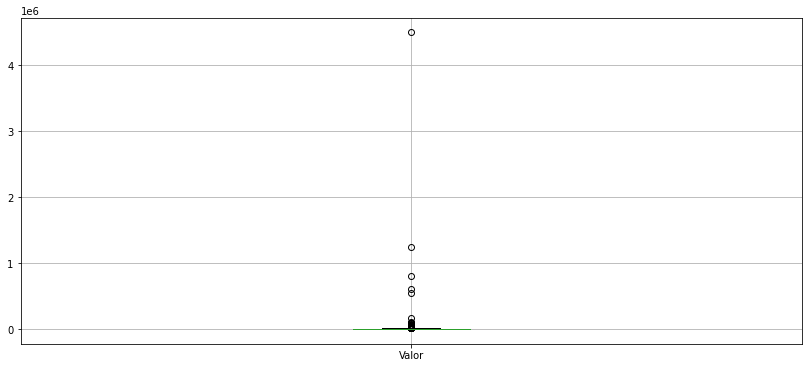

In [5]:
dados.boxplot(['Valor'])

In [6]:
dados[dados['Valor']>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,Tipo Agregado
7984,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,600980.0,Apartamento
11137,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN,800900.0,Casa
13249,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,550850.0,Apartamento
14471,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251186.0,Apartamento
16224,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN,4501100.0,Apartamento


In [18]:
valor = dados['Valor']

In [27]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [28]:
limite_inferior

-4250.0

<AxesSubplot:>

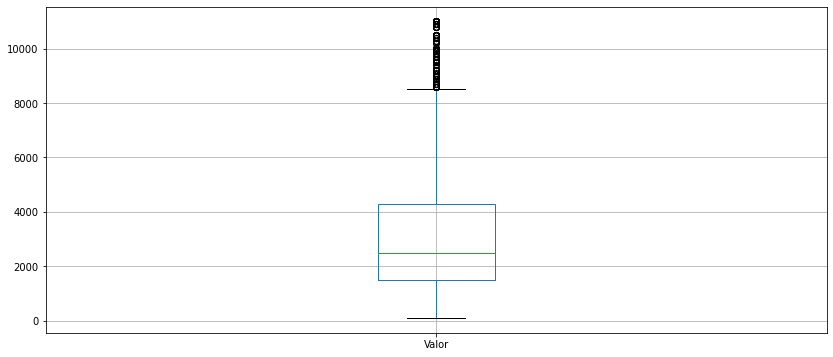

In [29]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

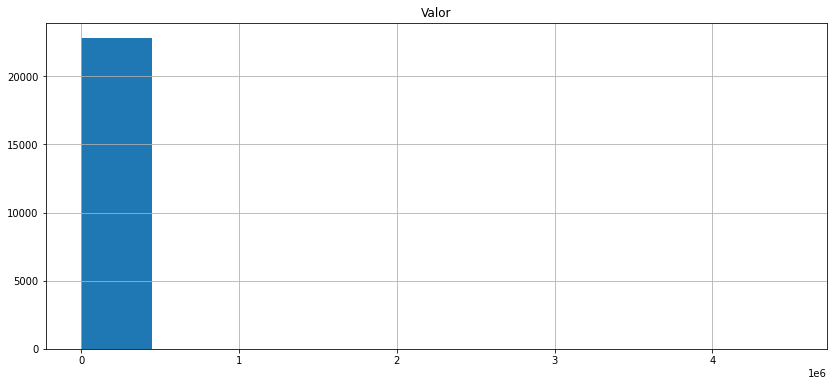

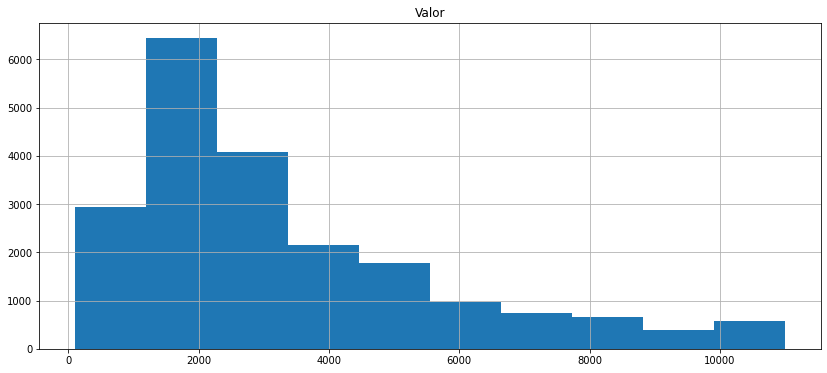

In [31]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Analise Por Grupos

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

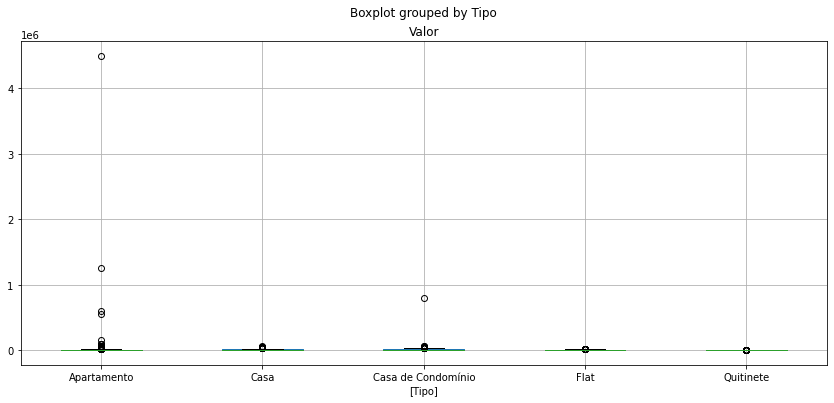

In [33]:
dados.boxplot(['Valor'], by=['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [40]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 8, 9, 10, 11, 13, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, ...], 'Casa': [1, 26, 58, 62, 101, 105, 153, 169, 191, 250, 262, 265, 276, 300, 323, 329, 346, 351, 369, 390, 397, 411, 437, 447, 488, 489, 495, 528, 561, 562, 587, 591, 592, 640, 643, 652, 658, 659, 684, 701, 724, 745, 749, 785, 796, 807, 884, 902, 968, 1017, 1065, 1073, 1159, 1164, 1166, 1199, 1221, 1296, 1303, 1367, 1386, 1401, 1422, 1467, 1481, 1485, 1497, 1502, 1529, 1532, 1546, 1645, 1665, 1700, 1721, 1727, 1731, 1737, 1750, 1776, 1784, 1832, 1884, 1909, 1950, 1981, 2010, 2019, 2038, 2103, 2123, 2140, 2160, 2186, 2192, 2193, 2220, 2259, 2291, 2294, ...], 'Cas

In [41]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [44]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Flat                  -2750.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [43]:
limite_inferior.Apartamento

-3500.0

In [45]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)
    

Apartamento
Casa
Casa de Condomínio
Flat
Quitinete


In [50]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

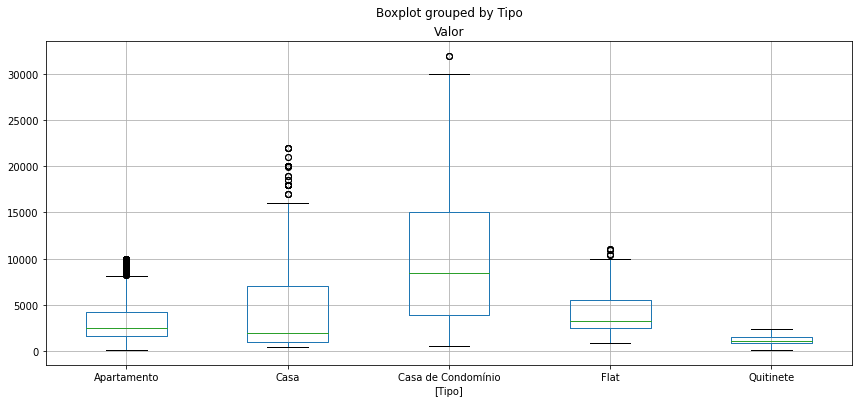

In [52]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [53]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)